<a href="https://colab.research.google.com/gist/Yashwanth1102/580f7db8e35ea173b01603d0c33eaa30/cifar100-with-dataaugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_26 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_27 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 128)        

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
195/195 [==============================] - 587s 3s/step - loss: 4.3167 - accuracy: 0.0373 - val_loss: 4.4848 - val_accuracy: 0.0324
Epoch 2/20
195/195 [==============================] - 584s 3s/step - loss: 3.8955 - accuracy: 0.0799 - val_loss: 4.5525 - val_accuracy: 0.0227
Epoch 3/20
195/195 [==============================] - 579s 3s/step - loss: 3.6814 - accuracy: 0.1124 - val_loss: 4.7079 - val_accuracy: 0.0146
Epoch 4/20
195/195 [==============================] - 582s 3s/step - loss: 3.5055 - accuracy: 0.1473 - val_loss: 4.9588 - val_accuracy: 0.0183
Epoch 5/20
195/195 [==============================] - 561s 3s/step - loss: 3.3534 - accuracy: 0.1750 - val_loss: 4.8970 - val_accuracy: 0.0207
Epoch 6/20
195/195 [==============================] - 551s 3s/step - loss: 3.2248 - accuracy: 0.2017 - val_loss: 5.0315 - val_accuracy: 0.0196
Epoch 7/20
195/195 [==============================] - 572s 3s/step - loss: 3.1132 - accuracy: 0.2213 - val_loss: 5.0900 - val_accuracy: 0.0200

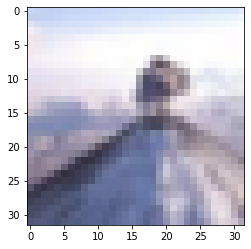

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height, img_num_channels = 32, 32, 3

(x_train, y_train), (x_test, y_test) = datasets.cifar100.load_data()

num_classes =100

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape)) 
model.add(Dropout(0.2)) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))) 
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')) 
model.add(Dropout(0.2)) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))) 
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')) 
model.add(Dropout(0.2)) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')) 
model.add(Dropout(0.2)) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')) 
model.add(Dropout(0.2)) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
model.add(Dropout(0.2)) 
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(Dropout(0.2)) 
model.add(tf.keras.layers.Dense(100, activation=tf.nn.softmax)) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.build(input_shape=(None,32,32,1)) 
 
model.summary() 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

datagen.fit(x_train)

model.fit_generator(datagen.flow(x_train, y_train, batch_size=256),
                        steps_per_epoch=x_train.shape[0] // 256,
                        epochs=20,
                        validation_data=(x_test, y_test)
)
# Generate generalization metrics
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
#print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

predictions = model.predict([x_test])
#print(predictions)

print(np.argmax(predictions[0]))


img_path = x_test[0]
print(img_path.shape)
if(len(img_path.shape) == 3):
    plt.imshow(np.squeeze(img_path))
elif(len(img_path.shape) == 2):
    plt.imshow(img_path)
else:
    print("Image cannot be shown")